# Casos confirmados de Covid-19

In [1]:
import pandas as pd
import numpy as np
import requests
from urllib.request import urlretrieve 
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from pmdarima.arima import auto_arima, ADFTest
#from pmdarima.arima import ADFTest
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#sns.set_theme(style='darkgrid')
#elemina os warnings das bibliotecas
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#%matplotlib inline
print("*** IMPORTES FEITO COM SUCESSO ***")

*** IMPORTES FEITO COM SUCESSO ***


In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
urlretrieve(url, 'C:/Users/Dell/Desktop/Backup/Desktop/Rogerio_/dadosCovid/casosGlobalCovid.csv')
#C:\Users\Dell\Desktop\Backup\Desktop\Rogerio_\dadosCovid
#c = pd.read_csv(url)

('C:/Users/Dell/Desktop/Backup/Desktop/Rogerio_/dadosCovid/casosGlobalCovid.csv',
 <http.client.HTTPMessage at 0x166ef5b7f40>)

In [3]:
df_covid = pd.read_csv(url)
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/

In [4]:
df_covid = df_covid.rename(columns = {'Country/Region':'Country'})
df_covid = df_covid.groupby('Country').sum().rename_axis('Country')#.reset_index(inplace=False)
#display(df_covid.head())
df_pais = df_covid.drop(['Lat', 'Long'], axis=1, inplace=False)
df_pais.head()
#display(df_pais.head())

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/

In [37]:
def new_df_treaty(df, str):
    
    df = pd.DataFrame(df).rename_axis('data').reset_index()
    df['data'] = pd.to_datetime(df['data'])
    df['day'] = df['data'].apply(lambda x : x.day)
    df['day_of_week'] = df['data'].apply(lambda x : calendar.day_name[x.weekday()])
    df['month'] = pd.DatetimeIndex(df['data']).month
    df['month_name'] = df["month"].map({1:"JAN",2:"FEB",3:"MAR",
                                        4:"APR",5:"MAY",6:"JUN",
                                        7:"JUL",8:"AUG",9:"SEP",
                                        10:"OCT",11:"NOV",12:"DEC"})
    df['difference'] = df[str].diff()
    df['ma7'] = df.difference.rolling(7).mean()
    df['ma14'] = df.difference.rolling(14).mean()
    df['ma21'] = df.difference.rolling(21).mean()
    df = df[(df[str] > 0 )]

    return df


def df_data_2020(df):
    
    df = df[(df['data'] >= '2020-01-01') & (df['data'] <= '2020-12-31') & (df['difference'] >= 0)]

    return df


def df_data_2021(df):
    
    df = df[(df['data'] >= '2021-01-01') & (df['data'] <= '2021-12-31') & (df['difference'] >= 0)]
    
    return df


def df_data_2022(df):
    
    df = df[(df['data'] >= '2022-01-01') & (df['data'] <= '2022-12-31') & (df['difference'] >= 0)]
    
    return df


def annotate_bar(ax):
    for p in ax.patches:
        y = p.get_height()
        ax.annotate(f'{int(y)}', xy=(p.get_x() + p.get_width()/2,y),
                    va = 'baseline', fontsize=10, color='black', xytext=(0,1),
                    textcoords='offset points', ha='center')


def annotate_bar_horizontal(ax):
    for p in ax.patches:
        x = p.get_width()
        ax.annotate(f'{int(x)}', xy=(x,p.get_y() + p.get_height()/2),
                    va = 'center', fontsize=10, color='black', xytext=(0,1),
                    textcoords='offset points', ha='left')


def trans_data(df, pais):
    
    df = pd.DataFrame(df).rename_axis('data')
    df['data'] = pd.to_datetime(df['data'])
    df = df.set_index('data')
    df = df[pais]
    
    return df

        
def plot_graf(df, pais):
    
    grup_day = (df.groupby('day')['difference']
                        .sum()
                        .to_frame()
                        .reset_index())
    
    grup_day_of_week = (df.groupby('day_of_week')['difference']
                        .sum()
                        .to_frame()
                        .reset_index())
    grup_day_of_week['day_of_week'] = grup_day_of_week['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,
                                                                                           'Thursday':4,'Friday':5,'Saturday':6, 
                                                                                           'Sunday':7})
    grup_day_of_week = grup_day_of_week.sort_values(by=['day_of_week'])
    grup_day_of_week['day_of_week'] = grup_day_of_week['day_of_week'].map({1:'Monday',2:'Tuesday',3:'Wednesday',
                                                                        4:'Thursday',5:'Friday',6:'Saturday', 
                                                                        7:'Sunday'})
    
    grup_month = (df.groupby('month_name')['difference']
                        .sum()
                        .to_frame()
                        .reset_index())
    grup_month['month_name'] = grup_month['month_name'].map({"JAN":1,"FEB":2,"MAR":3,
                                                             "APR":4,"MAY":5,"JUN":6,
                                                             "JUL":7,"AUG":8,"SEP":9,
                                                             "OCT":10,"NOV":11,"DEC":12})
    grup_month = grup_month.sort_values(by=['month_name'])
    grup_month['month_name'] = grup_month['month_name'].map({1:"JAN",2:"FEB",3:"MAR",
                                                             4:"APR",5:"MAY",6:"JUN",
                                                             7:"JUL",8:"AUG",9:"SEP",
                                                            10:"OCT",11:"NOV",12:"DEC"})
    
    
    data_min = df['data'].dt.strftime('%Y/%m/%d').min()
    data_max = df['data'].dt.strftime('%Y/%m/%d').max()
    
    mday_of_week = (grup_day_of_week['difference'].sum()/7)
    mday = (grup_day['difference'].sum()/31)
    mmonth = (grup_month['difference'].sum()/12)
    
    ts = df[['data', pais]]
    ts = trans_data(ts, pais)
    decomposicao = seasonal_decompose(ts, period=12)
    
    #tendencia
    tendencia = decomposicao.trend
    #sozonalidade
    sazonal = decomposicao.seasonal
    #erro
    aleatorio = decomposicao.resid
    
    modelo = ARIMA(ts, order=(2, 1, 2), freq=ts.index.inferred_freq) 
    modelo_treinado = modelo.fit()
    modelo_treinado.summary()
    
    fig = plt.figure(figsize=(20,15))

    fig.set_constrained_layout('w_pad')

    gs = fig.add_gridspec(4, 3)

    ax0 = fig.add_subplot(gs[0,:])

    plt.bar(df['data'], df['difference'], label = f'Casos {pais}', color='#03BB85') 
    sns.lineplot(x = df['data'],  y = 'ma7', data = df, label = 'Média Móvel 7 dias', color='black', linewidth=2)
    sns.lineplot(x = df['data'],  y = 'ma14', data = df, label = 'Média Móvel 14 dias', color='red', linewidth=2)
    sns.lineplot(x = df['data'],  y = 'ma21', data = df, label = 'Média Móvel 21 dias', color='purple', linewidth=2)
    plt.xticks(rotation=45)
    ax0.set(
        title= f'Quantidades de Casos de Covid-19 no período de {data_min} á {data_max}',
        ylabel='Quantidades de Casos',
        #yticks=[],
        #xticks=[],
        xlabel='Data')

    ax01 = fig.add_subplot(gs[1, 0])
    
    sns.barplot(data=grup_day_of_week, x='day_of_week', y='difference')
    plt.axhline(y=mday_of_week, xmin=0.0, xmax=1, color='black')
    plt.legend([f'Média {mday_of_week:.0f}'])
    annotate_bar(ax01)
    ax01.set(
        title='Quantidades de casos de Covid-19 por nome da semana',
        ylabel='Quantidades de Casos',
        #yticks=[],
        #xticks=[],
        xlabel='Nome da Semana')

    ax02 = fig.add_subplot(gs[1, 1])

    sns.barplot(data=grup_day, x='day', y='difference')
    plt.axhline(y=mday, xmin=0.0, xmax=1, color='black')
    plt.legend([f'Média {mday:.0f}'])
    ax02.set(
        title='Quantidades de casos de Covid-19 por dia da semana',
        ylabel='Quantidades de Casos',
        #yticks=[],
        #xticks=[],
        xlabel='Dias da Semana')

    ax03 = fig.add_subplot(gs[1, 2])

    sns.barplot(data=grup_month, x='month_name', y='difference')
    plt.axhline(y=mmonth, xmin=0.0, xmax=1, color='black')
    plt.legend([f'Média {mmonth:.0f}'])
    ax03.set(
        title='Quantidades de casos de Covid-19 por meses',
        ylabel='Quantidades de Casos',
        #yticks=[],
        #xticks=[],
        xlabel='Meses')

    ax04 = fig.add_subplot(gs[2, 0])
    plt.plot(sazonal)
    plt.xticks(rotation=45)
    ax04.set(
        title='Sazonalidade',
        #yticks=[],
        #xticks=[],
        xlabel='Data')

    ax05 = fig.add_subplot(gs[2, 1])
    plt.plot(tendencia)
    plt.xticks(rotation=45)
    ax05.set(
        title='Tendência',
        #yticks=[],
        #xticks=[],
        xlabel='Data')

    ax06 = fig.add_subplot(gs[2, 2])
    plt.plot(aleatorio)
    plt.xticks(rotation=45)
    ax06.set(
        title='Aleatoriedade',
        #yticks=[],
        #xticks=[],
        xlabel='Data')
    
    ax07 = fig.add_subplot(gs[-1, -1])
    plt.plot(df['data'], df[pais], label = f'Casos {pais}') 
    plt.xticks(rotation=45)
    ax07.set(
        title= 'Evolução de Casos de Covid-19',
        ylabel='Quantidades de Casos',
        #yticks=[],
        #xticks=[],
        xlabel='Data')

    ax08 = fig.add_subplot(gs[-1,:2])
    eixo = ts.plot()
    plot_predict(modelo_treinado, '2021-09-01', '2023-02-28', ax = eixo, plot_insample = True)
    ax08.set(
        title= f'Forecast dados infectados {pais}',
        ylabel='Quantidades de Casos',
        #yticks=[],
        #xticks=[],
        xlabel='Data')
    
    fig.suptitle(f'Análise Covid-19 {pais}', fontsize=20, y=1.05)

    view = plt.show()
    
    return view

In [35]:
country = 'Brazil'
dd = df_pais.loc[country][1:]
dd = new_df_treaty(dd, country)

In [78]:
list_country = df_pais.reset_index()
#list_country['Country'].tolist()
list_country

Country Province/State  1/22/20  1/23/20  1/24/20  1/25/20  \
0             Afghanistan              0        0        0        0        0   
1                 Albania              0        0        0        0        0   
2                 Algeria              0        0        0        0        0   
3                 Andorra              0        0        0        0        0   
4                  Angola              0        0        0        0        0   
..                    ...            ...      ...      ...      ...      ...   
196    West Bank and Gaza              0        0        0        0        0   
197  Winter Olympics 2022              0        0        0        0        0   
198                 Yemen              0        0        0        0        0   
199                Zambia              0        0        0        0        0   
200              Zimbabwe              0        0        0        0        0   

     1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  \
0          0        0        0        0        0        0       0       0   
1          0        0        0        0        0        0       0       0   
2          0        0        0        0        0        0       0       0   
3          0        0        0        0        0        0       0       0   
4          0        0        0        0        0        0       0       0   
..       ...      ...      ...      ...      ...      ...     ...     ...   
196        0        0        0        0        0        0       0       0   
197        0        0        0        0        0        0       0       0   
198        0        0        0        0        0        0       0       0   
199        0        0        0        0        0        0       0       0   
200        0        0        0        0        0        0       0       0   

     2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  \
0         0       0       0       0       0       0       0        0        0   
1         0       0       0       0       0       0       0        0        0   
2         0       0       0       0       0       0       0        0        0   
3         0       0       0       0       0       0       0        0        0   
4         0       0       0       0       0       0       0        0        0   
..      ...     ...     ...     ...     ...     ...     ...      ...      ...   
196       0       0       0       0       0       0       0        0        0   
197       0       0       0       0       0       0       0        0        0   
198       0       0       0       0       0       0       0        0        0   
199       0       0       0       0       0       0       0        0        0   
200       0       0       0       0       0       0       0        0        0   

     2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
196        0        0        0        0        0        0        0        0   
197        0        0        0        0        0        0        0        0   
198        0        0        0        0        0        0        0        0   
199        0        0        0        0        0        0        0        0   
200        0        0        0        0        0        0        0        0   

     2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  \
0          0        0        0        0        5        5        5        5   
1          0        0        0        0        0    

In [ ]:
df['data'] = pd.to_datetime(df['data'])

In [13]:
country = 'Brazil'
dd = df_pais.loc[country]

In [ ]:
country = 'China'
dd = df_pais.loc[country][1:]
dd = new_df_treaty(dd, country)
data_min = dd['data'].dt.strftime('%Y/%m/%d').min()
data_max = dd['data'].dt.strftime('%Y/%m/%d').max()
print(f'{data_min}')
print(f'{data_max}')

In [ ]:
from datetime import datetime

d1 = datetime.strptime(data_min, '%Y/%m/%d').date()
d2 = datetime.strptime(data_max, '%Y/%m/%d').date()

diff = d2 - d1

days = diff.days
years, days = days // 365, days % 365
months, days = days // 30, days % 30

seconds = diff.seconds
hours, seconds = seconds // 3600, seconds % 3600
minutes, seconds = seconds // 60, seconds % 60

In [79]:
diff.days // 30
months, days

35

In [41]:
country = 'Brazil'
dd = df_pais.loc[country][1:]
dd = new_df_treaty(dd, country)
dd = df_data_2021(dd)
##plot_graf(dd, country)

- Exemplo da estrutura dos gráficos

Text(0.5, 1.0, 'gs[-1,:2]')

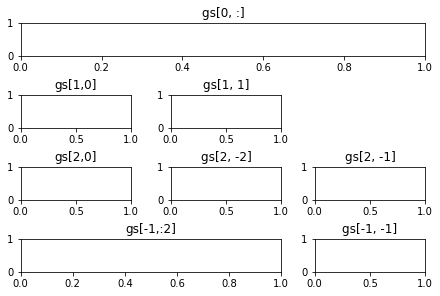

In [144]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(4, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, 0])
f3_ax2.set_title('gs[1,0]')
f3_ax3 = fig3.add_subplot(gs[1, 1])
f3_ax3.set_title('gs[1, 1]')
f3_ax4 = fig3.add_subplot(gs[2, 0])
f3_ax4.set_title('gs[2,0]')
f3_ax5 = fig3.add_subplot(gs[2, -2])
f3_ax5.set_title('gs[2, -2]')
f3_ax6 = fig3.add_subplot(gs[2, -1])
f3_ax6.set_title('gs[2, -1]')
f3_ax7 = fig3.add_subplot(gs[-1, -1])
f3_ax7.set_title('gs[-1, -1]')
f3_ax8 = fig3.add_subplot(gs[-1,:2])
f3_ax8.set_title('gs[-1,:2]')

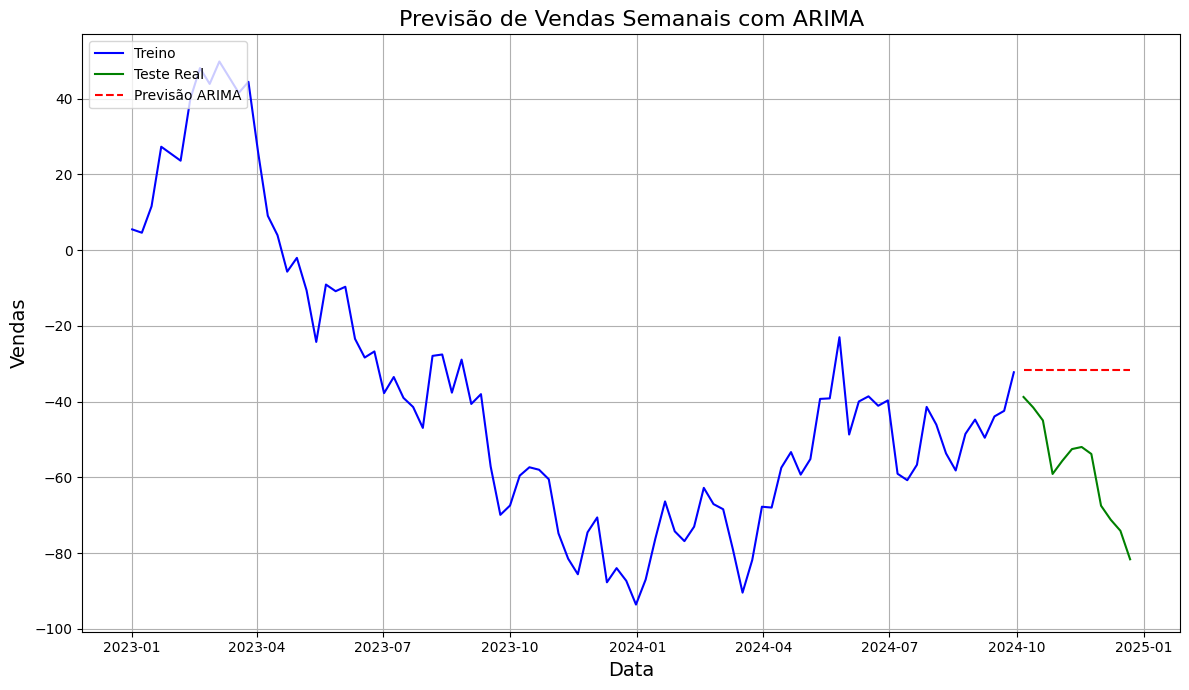

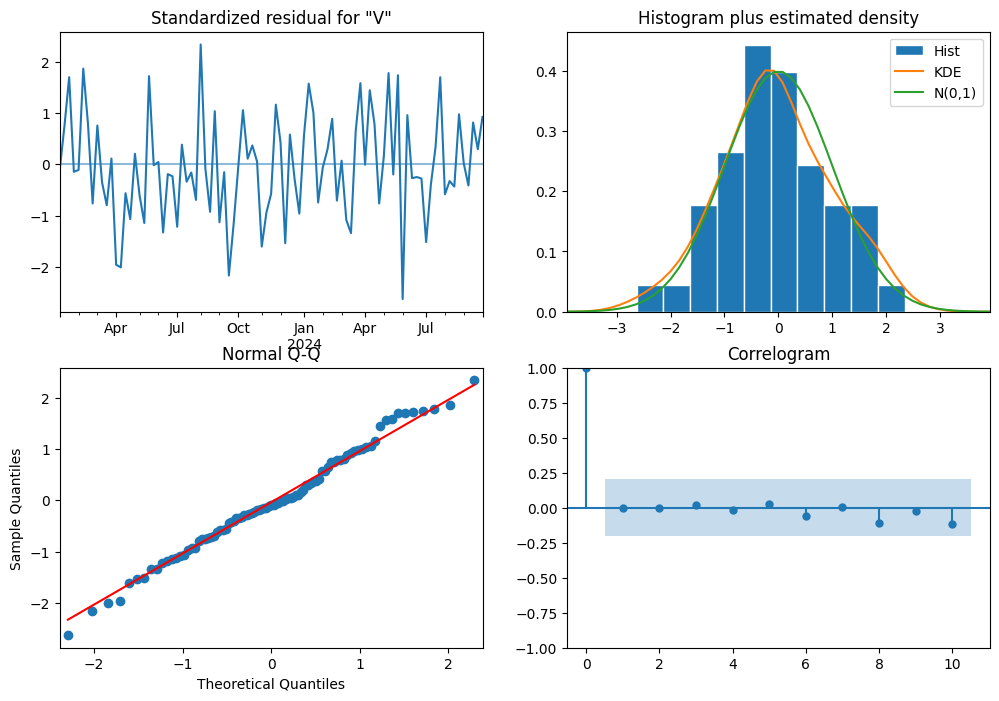

In [7]:
from statsmodels.tsa.arima.model import ARIMA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dados fictícios
np.random.seed(42)
data = pd.date_range(start="2023-01-01", periods=104, freq='W')  # dois anos de vendas semanais
vendas = np.cumsum(np.random.randn(104)*10 + 0.5)

df = pd.DataFrame(data={"Vendas": vendas}, index=data)
# Divisão de treino e teste
train = df[:-12]  
test = df[-12:]

# Modelagem ARIMA
model = ARIMA(train, order=(5,1,0))
fit = model.fit()

# Previsão
forecast = fit.forecast(steps=12)[0]
df_forecast = pd.DataFrame(data={"Forecast": forecast}, index=test.index)

# Visualização
plt.figure(figsize=(12, 7))
plt.plot(train, label="Treino", color='blue')
plt.plot(test, label="Teste Real", color='green')
plt.plot(df_forecast, label="Previsão ARIMA", linestyle="--", color='red')
plt.title("Previsão de Vendas Semanais com ARIMA", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Vendas", fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagnóstico
fit.plot_diagnostics(figsize=(12, 8))
plt.show()

# Nova analise com o métedo ARIMA
tendencia, sazonalidade e aleatoridade

- Depois de ter feito todos os paços a melhor opção é colocar tudo isso dentro de uma função para otimização de código

In [47]:
def trans_data(df, pais):
    
    df = pd.DataFrame(df).rename_axis('data')
    df['data'] = pd.to_datetime(df['data'])
    df = df.set_index('data')
    df = df[pais]

    return df

In [8]:
dados_Brasil = df_pais.loc['Brazil'][1:]
df = pd.DataFrame(dados_Brasil).rename_axis('data')
df = df.reset_index(level=0, drop=False)#.reset_index(level=0, inplace = True)
#df['data'] = pd.to_datetime(df['data'])
#df = df.set_index('Brazil')
#df = df.reset_index(level=0, drop=False)
#df = df['Brazil']
#date = df['data']
#country = df['Brazil']
df.head(3)

,data,Brazil
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0


In [9]:
date = df['data'].to_list()
date = pd.to_datetime(date)
date[1:10]

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31'],
              dtype='datetime64[ns]', freq=None)

In [10]:
data = df['Brazil'].to_list()
data[1:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
df2 = pd.DataFrame(data={"Contaminacao": data}, index=date)
df2

,Contaminacao
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2023-03-05,37081209
2023-03-06,37076053
2023-03-07,37076053
2023-03-08,37076053


In [15]:
"""
decomp = seasonal_decompose(ts,freq=20)
fig = decomp.plot()
fig.set_size_inches(15,10)
plt.xticks(rotation=45)
_ = plt.show()
"""
#dados_Brasil = df_pais.loc['Brazil'][1:]
#ts = trans_data(dados_Brasil,'Brazil')
modelo = ARIMA(df2, order=(2, 1, 2)) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Contaminacao   No. Observations:                 1143
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -12910.530
Date:                Mon, 20 Nov 2023   AIC                          25831.059
Time:                        14:52:35   BIC                          25856.262
Sample:                    01-22-2020   HQIC                         25840.576
                         - 03-09-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0465      0.065     16.224      0.000       0.920       1.173
ar.L2         -0.0520      0.063     -0.823      0.411      -0.176       0.072
ma.L1         -0.5237      0.065     -8.039      0.000      -0.651      -0.396
ma.L2         -0.2522      0.046     -5.436      0.000      -0.343      -0.161
sigma2      4.008e+08   1.21e-10   3.32e+18      0.000    4.01e+08    4.01e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4844.25
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.08e+33. Standard errors may be unstable.
"""

In [16]:
# Previsões de 10 datas no futuro
previsoes = modelo_treinado.forecast(steps = 10)[0]
previsoes

37077749.737882234

Text(0, 0.5, 'Valor em milhões')

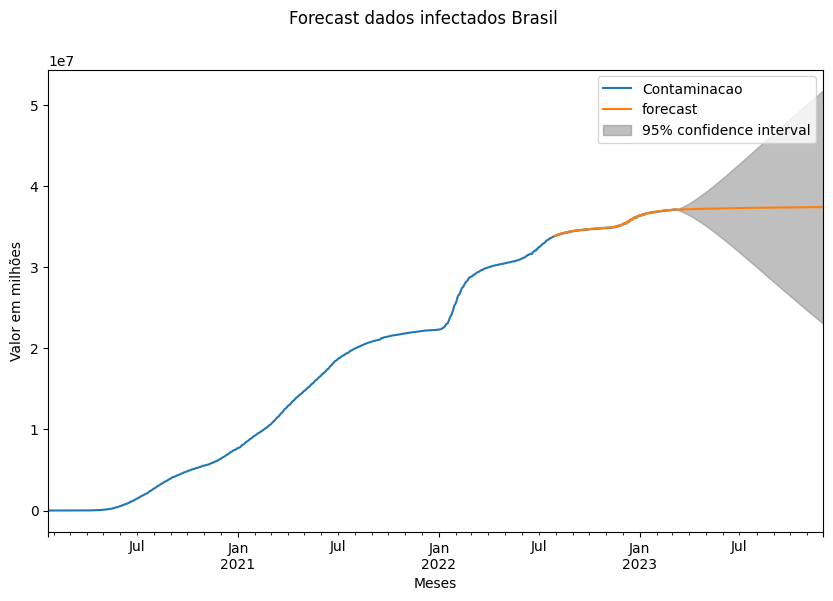

In [19]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = df2.plot(figsize=(10, 6))
plot_predict(modelo_treinado, '2022-07-31', '2023-11-30', ax = eixo, plot_insample = True)
plt.suptitle('Forecast dados infectados Brasil')#, fontweight='bold', fontsize=20)
plt.xlabel('Meses')#, fontweight='bold', fontsize=15)
plt.ylabel('Valor em milhões')#, fontweight='bold', fontsize=15)

- Podemos também incrementar ainda mais nossa função para ficar mais robusta

In [163]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    ts = dados['Brazil']
    adf_test = ADFTest(alpha = 0.05)
    adf_test.should_diff(ts)
    modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
    modelo_treinado = modelo.fit(disp=False)
    eixo = ts.plot(figsize=(10, 6))
    modelo_treinado.plot_predict('2021-06-01', '2022-07-31', ax = eixo, plot_insample = True)
    plt.suptitle('Forecast dados infectados Brasil')
    plt.xlabel('Meses')
    plt.ylabel('Valor em milhões')
    return modelo_treinado

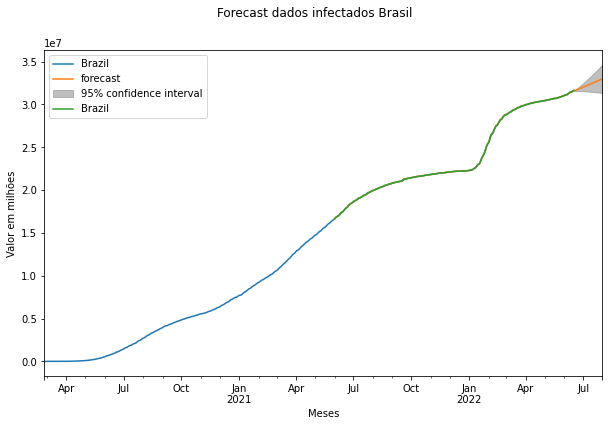

In [164]:
data = trans_data(dados_Brasil)
data

# Nova analise com o métedo auto_ARIMA

In [96]:
def autoArima(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    return dados

In [97]:
Brasil = autoArima(dados_Brasil)
Brasil

,Brazil
data,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2023-03-05,37081209
2023-03-06,37076053
2023-03-07,37076053


In [98]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Brasil)

(0.23508164935307152, True)

In [99]:
Brasil.shape

(1143, 1)

In [100]:
train = Brasil[:700]
test = Brasil[-137:]

In [101]:
train.tail()

,Brazil
data,
2021-12-17,22213731
2021-12-18,22216112
2021-12-19,22217570
2021-12-20,22220209
2021-12-21,22223943


In [102]:
test.head()

,Brazil
data,
2022-10-24,34783786
2022-10-25,34799324
2022-10-26,34807075
2022-10-27,34815258
2022-10-28,34815258


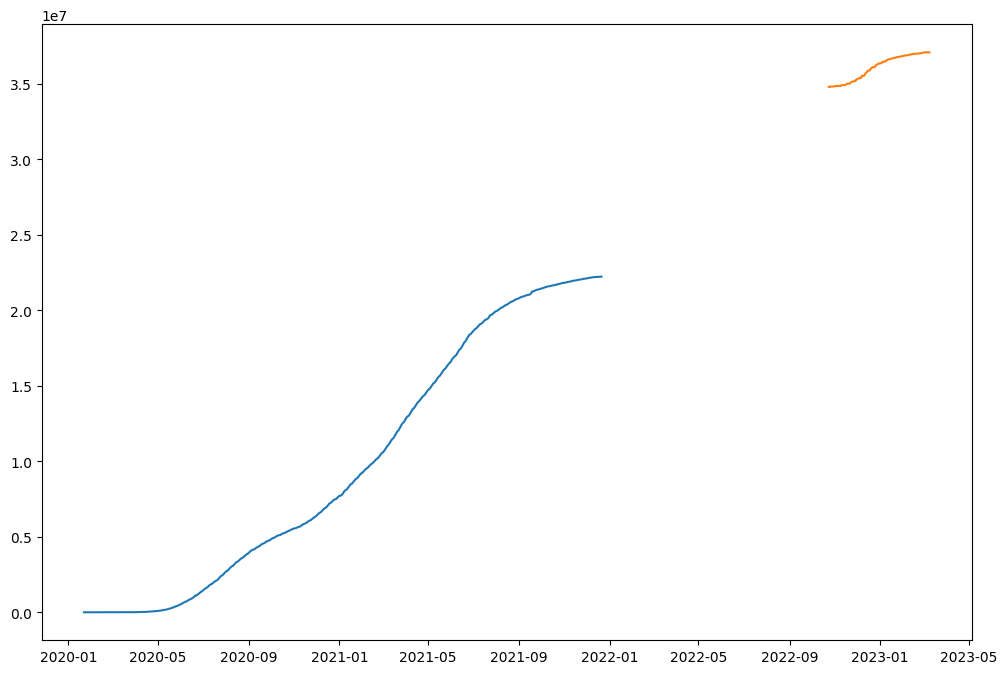

In [103]:
plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test)

In [104]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=15636.962, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=15377.543, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=15258.262, Time=0.45 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=15477.961, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=15257.661, Time=0.68 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=15343.902, Time=0.37 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=15240.278, Time=3.00 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=15251.771, Time=1.95 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=15231.307, Time=4.60 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=15232.178, Time=3.38 sec
 ARIMA(0,1,1)(4,1,1)[12]             : AIC=15230.053, Time=10.39 sec
 ARIMA(0,1,1)(4,1,0)[12]             : AIC=15228.203, Time=6.63 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=15229.390, Time=23.59 sec
 ARIMA(0,1,1)(5,1,1)[12]             : AIC=15215.266, Time=65.72 sec
 A

In [105]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  700
Model:             SARIMAX(0, 1, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood               -7592.363
Date:                                    Thu, 16 Nov 2023   AIC                          15200.726
Time:                                            21:25:40   BIC                          15236.985
Sample:                                        01-22-2020   HQIC                         15214.754
                                             - 12-21-2021                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4335      0.049      8.892      0.000       0.338       0.529
ar.S.L12      -0.8125      0.161     -5.041      0.000      -1.128      -0.497
ar.S.L24      -1.0847      0.068    -16.057      0.000      -1.217      -0.952
ar.S.L36      -0.3289      0.126     -2.604      0.009      -0.577      -0.081
ma.S.L12       0.1245      0.171      0.728      0.466      -0.210       0.459
ma.S.L24       0.6037      0.090      6.738      0.000       0.428       0.779
ma.S.L36      -0.2526      0.144     -1.758      0.079      -0.534       0.029
sigma2      3.706e+08   4.52e-10    8.2e+17      0.000    3.71e+08    3.71e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.79   Jarque-Bera (JB):              1003.16
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.64e+33. Standard errors may be unstable.
"""

In [110]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['brasil']
prediction.head()

,brasil
data,
2022-10-24,NaN
2022-10-25,NaN
2022-10-26,NaN
2022-10-27,NaN
2022-10-28,NaN


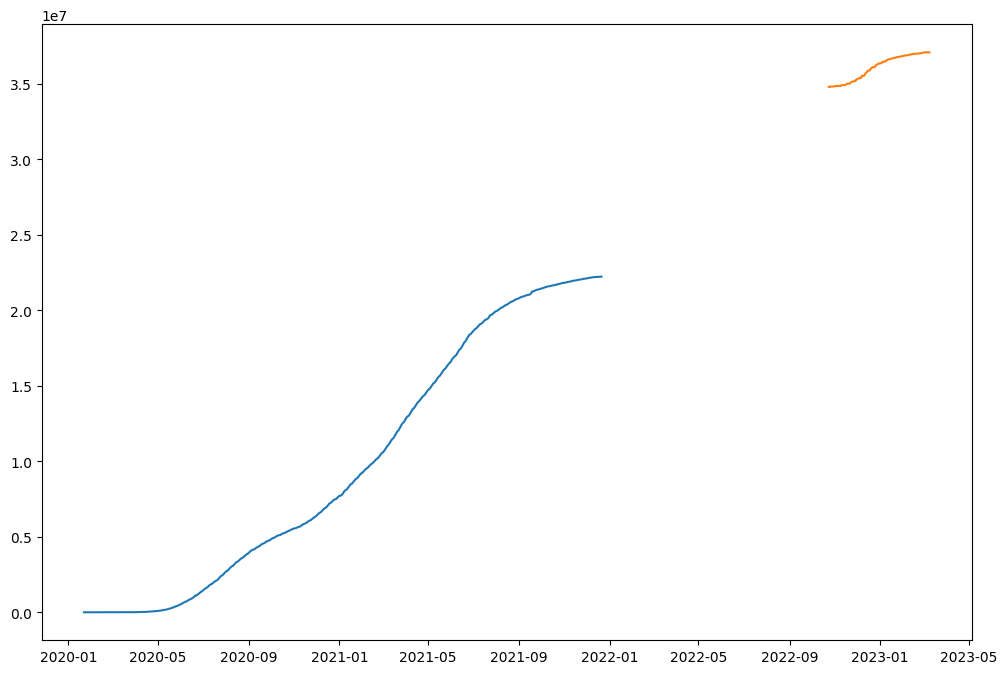

In [107]:
plt.figure(figsize=(12, 8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
#plt.legend(loc = 'Left corner')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
test['brasil'] = prediction
r2_score(test['Brazil'], test['brasil'])

- Modelo mais simples

In [60]:
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  515
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -5523.904
Date:                Sun, 25 Jul 2021   AIC                          11063.808
Time:                        12:07:15   BIC                          11097.731
Sample:                             0   HQIC                         11077.105
                                - 515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1442      0.040      3.630      0.000       0.066       0.222
ar.L2         -0.6000      0.029    -20.514      0.000      -0.657      -0.543
ar.L3         -0.3652      0.033    -11.044      0.000      -0.430      -0.300
ar.L4         -0.3567      0.036     -9.937      0.000      -0.427      -0.286
ar.L5         -0.4846      0.040    -12.039      0.000      -0.563      -0.406
ma.L1         -1.0154      0.039    -26.326      0.000      -1.091      -0.940
ma.L2          0.7226      0.038     19.160      0.000       0.649       0.797
sigma2      1.333e+08   1.87e-10   7.12e+17      0.000    1.33e+08    1.33e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):               573.36
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               8.09   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.98e+32. Standard errors may be unstable.
"""

In [61]:
# Visualização dos próximos 10 valores
proximos_10 = modelo_auto.predict(n_periods = 10)
proximos_10 

array([19702713.702059  , 19739871.85484392, 19788367.60407526,
       19834289.50764736, 19907557.38047823, 19983260.97555983,
       20037392.35560396, 20072387.59149318, 20108170.20915848,
       20149307.63369676])

# Reset para exportar dados

In [37]:
df_pais.reset_index()

,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290
1,Albania,0,0,0,0,0,0,0,0,0,...,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126
2,Algeria,0,0,0,0,0,0,0,0,0,...,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310
3,Andorra,0,0,0,0,0,0,0,0,0,...,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556
4,Angola,0,0,0,0,0,0,0,0,0,...,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,0,2,2,2,2,2,2,2,2,...,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287
192,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992
193,Yemen,0,0,0,0,0,0,0,0,0,...,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942
194,Zambia,0,0,0,0,0,0,0,0,0,...,299971,300587,301203,301630,301924,302569,303266,304002,304353,304656


In [155]:
df_pais.to_csv('dadosCovidPaises.csv')